<a href="https://colab.research.google.com/github/alexiaddiaz0907/DSC410/blob/master/DSC410_Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/bellevue-university/dsc410/main/12%20Week/week_6/data/startups_profit.csv'
df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
print(df1)

    R&D Spend  Administration  Marketing Spend       State        Profit 
0   165349.20       136897.80        471784.10    New York   $192,261.83 
1   162597.70       151377.59        443898.53  California   $191,792.06 
2   153441.51       101145.55        407934.54          FL   $191,050.39 
3   144372.41       118671.85        383199.62    New York   $182,901.99 
4   142107.34        91391.77        366168.42          FL   $166,187.94 
5   131876.90        99814.71        362861.36    New York   $156,991.12 
6   134615.46       147198.87        127716.82  California   $156,122.51 
7   130298.13       145530.06        323876.68          FL   $155,752.60 
8   120542.52       148718.95        311613.29    New York   $152,211.77 
9   123334.88       108679.17        304981.62  California   $149,759.96 
10  101913.08       110594.11        229160.95          FL   $146,121.95 
11  100671.96        91790.61        249744.55  California   $144,259.40 
12   93863.75       127320.38        2

** EDA & Feature Engineering**

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4    Profit          50 non-null     object 
dtypes: float64(3), object(2)
memory usage: 2.1+ KB


In [47]:
#Change state to category
df1['State'] = pd.factorize(df1['State'])[0]
print(df1)

    R&D Spend  Administration  Marketing Spend  State        Profit 
0   165349.20       136897.80        471784.10      0   $192,261.83 
1   162597.70       151377.59        443898.53      1   $191,792.06 
2   153441.51       101145.55        407934.54      2   $191,050.39 
3   144372.41       118671.85        383199.62      0   $182,901.99 
4   142107.34        91391.77        366168.42      2   $166,187.94 
5   131876.90        99814.71        362861.36      0   $156,991.12 
6   134615.46       147198.87        127716.82      1   $156,122.51 
7   130298.13       145530.06        323876.68      2   $155,752.60 
8   120542.52       148718.95        311613.29      0   $152,211.77 
9   123334.88       108679.17        304981.62      1   $149,759.96 
10  101913.08       110594.11        229160.95      2   $146,121.95 
11  100671.96        91790.61        249744.55      1   $144,259.40 
12   93863.75       127320.38        249839.44      2   $141,585.52 
13   91992.39       135495.07     

In [48]:
df1[' Profit '] = df1[' Profit '].str.replace(',', '').str.replace('$', '').astype(float)
print(df1.dtypes)

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State                int64
 Profit            float64
dtype: object


<ipython-input-48-d13b79f975fe>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1[' Profit '] = df1[' Profit '].str.replace(',', '').str.replace('$', '').astype(float)


In [49]:
# ID any null values
df1.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
 Profit            0
dtype: int64

In [50]:
# ID duplicate values
df1.duplicated().sum()

0

In [51]:
df1.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,0.980000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.820403,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [52]:
#Corrleation between variables 
corr_matrix = df1.corr()
print(corr_matrix)

                 R&D Spend  Administration  Marketing Spend     State  \
R&D Spend         1.000000        0.241955         0.724248  0.037930   
Administration    0.241955        1.000000        -0.032154  0.003026   
Marketing Spend   0.724248       -0.032154         1.000000  0.137777   
State             0.037930        0.003026         0.137777  1.000000   
 Profit           0.972900        0.200717         0.747766  0.048471   

                  Profit   
R&D Spend        0.972900  
Administration   0.200717  
Marketing Spend  0.747766  
State            0.048471  
 Profit          1.000000  


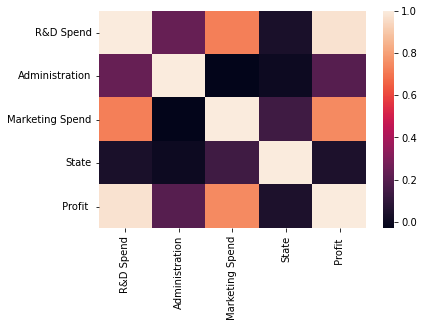

In [53]:
# Visualize corrleation between variables
# library
import seaborn as sns
import pandas as pd
import numpy as np

# Default heatmap
plot = sns.heatmap(corr_matrix)

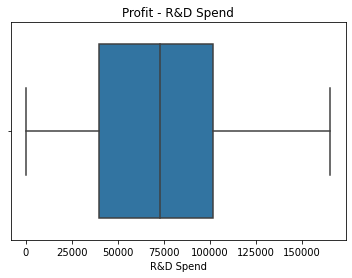

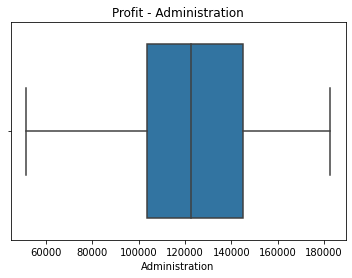

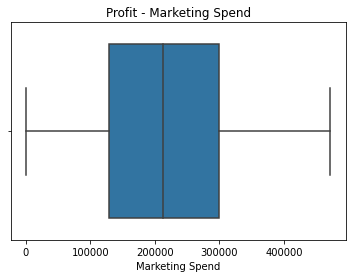

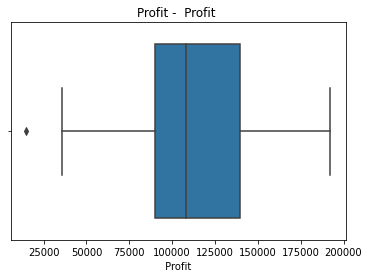

In [56]:
# Dectect Outliners

def boxplot(column):
    sns.boxplot(data=df1,x=df1[f"{column}"])
    plt.title(f"Profit - {column}")
    plt.show()

boxplot('R&D Spend')
boxplot('Administration')
boxplot('Marketing Spend')
boxplot(' Profit ')


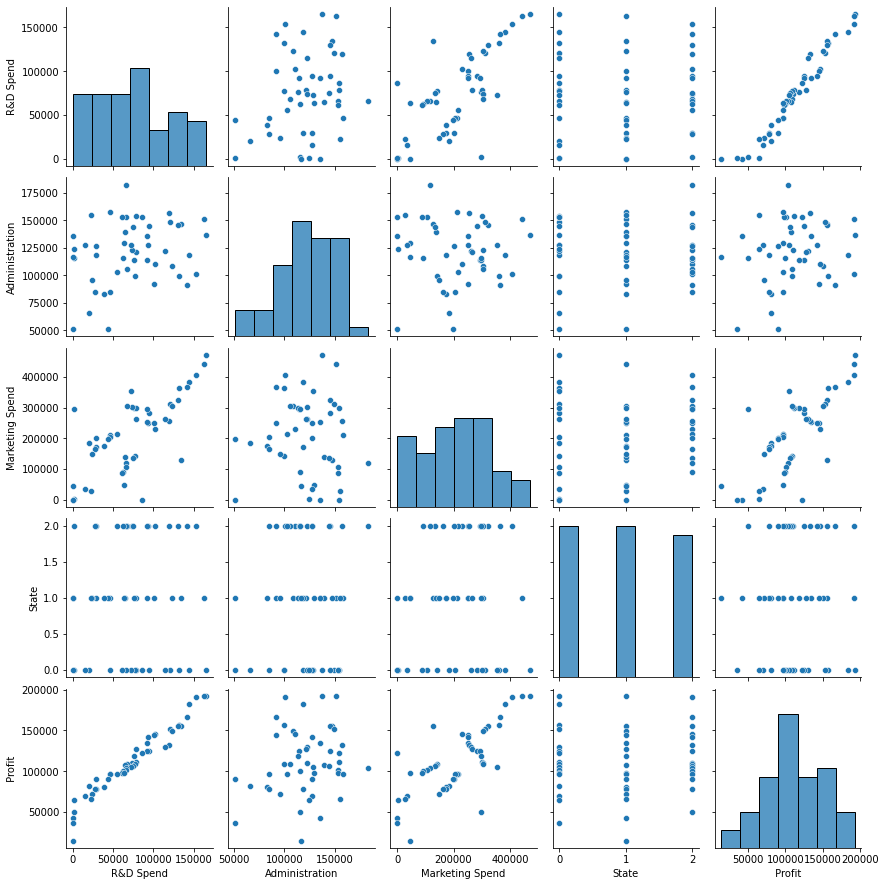

In [58]:
sns.pairplot(df1)
plt.show()

**Create Linear Eval**

In [60]:
x = df1[["R&D Spend", "Administration", "Marketing Spend"]] # dependent variable
y = df1[" Profit "]

x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)


In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Profit": ypred.flatten()})
print(data.head())

   Predicted Profit
0     126703.027165
1      84894.750816
2      98893.418160
3      46501.708150
4     129128.397344


In [67]:
# Model Eval
from math import sqrt
# Model performance
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Coefficients: [[ 0.80377928 -0.06792917  0.03124155]]
Intercept: [54071.87574599]
